## Aprendizado de Máquina Supervisionado

### Nosso Dataset 

Este banco de dados contém 76 atributos, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles.  Em particular, o banco de dados de Cleveland é o único usado por pesquisadores de ML até o momento.  O campo “meta” refere-se à presença de doença cardíaca no paciente.  É um número inteiro com valor de 0 (sem presença) a 4. Experimentos com o banco de dados de Cleveland concentraram-se simplesmente na tentativa de distinguir presença (valores 1,2,3,4) de ausência (valor 0).  
   
Os nomes e números de segurança social dos pacientes foram recentemente removidos do banco de dados e substituídos por valores fictícios.


### As colunas

### Descrição das Variáveis do Conjunto de Dados de Doenças Cardíacas

| Nome da Variável | Papel    | Tipo         | Demográfico | Descrição                                                             | Unidades   | Valores Faltantes |
|------------------|----------|--------------|-------------|----------------------------------------------------------------------|------------|-------------------|
| **age**          | Feature  | Integer      | Idade       | Idade do paciente                                                     | Anos       | Não               |
| **sex**          | Feature  | Categorical  | Sexo        | Sexo do paciente (1 = masculino, 0 = feminino)                        | N/A        | Não               |
| **cp**           | Feature  | Categorical  |             | Tipo de dor no peito                                                  | N/A        | Não               |
|                  |          |              |             | - 0: Sem dor                                                          |            |                   |
|                  |          |              |             | - 1: Angina típica                                                    |            |                   |
|                  |          |              |             | - 2: Angina atípica                                                   |            |                   |
|                  |          |              |             | - 3: Dor não anginosa                                                 |            |                   |
| **trestbps**     | Feature  | Integer      |             | Pressão arterial em repouso (na admissão ao hospital)                 | mm Hg      | Não               |
| **chol**         | Feature  | Integer      |             | Colesterol sérico                                                     | mg/dl      | Não               |
| **fbs**          | Feature  | Categorical  |             | Glicemia de jejum > 120 mg/dl (1 = verdadeiro; 0 = falso)             | N/A        | Não               |
| **restecg**      | Feature  | Categorical  |             | Resultados do eletrocardiograma de repouso                            | N/A        | Não               |
|                  |          |              |             | - 0: Normal                                                           |            |                   |
|                  |          |              |             | - 1: Anormalidade na onda ST-T                                        |            |                   |
|                  |          |              |             | - 2: Hipertrofia ventricular esquerda provável ou definitiva          |            |                   |
| **thalach**      | Feature  | Integer      |             | Frequência cardíaca máxima alcançada                                  | bpm        | Não               |
| **exang**        | Feature  | Categorical  |             | Angina induzida por exercício (1 = sim; 0 = não)                      | N/A        | Não               |
| **oldpeak**      | Feature  | Integer      |             | Depressão do segmento ST induzida por exercício em relação ao repouso | N/A        | Não               |
| **slope**        | Feature  | Categorical  |             | A inclinação do segmento ST do pico do exercício                      | N/A        | Não               |
|                  |          |              |             | - 0: Inclinação para cima                                             |            |                   |
|                  |          |              |             | - 1: Plana                                                            |            |                   |
|                  |          |              |             | - 2: Inclinação para baixo                                            |            |                   |
| **ca**           | Feature  | Integer      |             | Número de vasos principais (0-3) corados por fluoroscopia             | N/A        | Não               |
| **thal**         | Feature  | Categorical  |             | Talassemia                                                            | N/A        | Não               |
|                  |          |              |             | - 1: Normal                                                           |            |                   |
|                  |          |              |             | - 2: Defeito fixo                                                     |            |                   |
|                  |          |              |             | - 3: Defeito reversível                                               |            |                   |
| **target**       | Target   | Categorical  |             | Diagnóstico de doença cardíaca                                        | N/A        | Não               |
|                  |          |              |             | - 0: Ausência de doença cardíaca                                      |            |                   |
|                  |          |              |             | - 1: Presença de doença cardíaca                                      |            |                   |


In [21]:

from sklearn.datasets import fetch_openml

# Fetch the heart disease dataset# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:


# Carregar os dados
from sklearn.datasets import fetch_openml
heart_disease = fetch_openml(name='heart-disease', version=1, as_frame=True)
df = heart_disease.data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [23]:
df.shape

(303, 14)

In [24]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

In [25]:
df['target'].value_counts()

target
1.0    165
0.0    138
Name: count, dtype: int64

In [26]:
X = df.copy()
y = df['target'].copy()

In [27]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

y_pred

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1.])

In [28]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        41
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



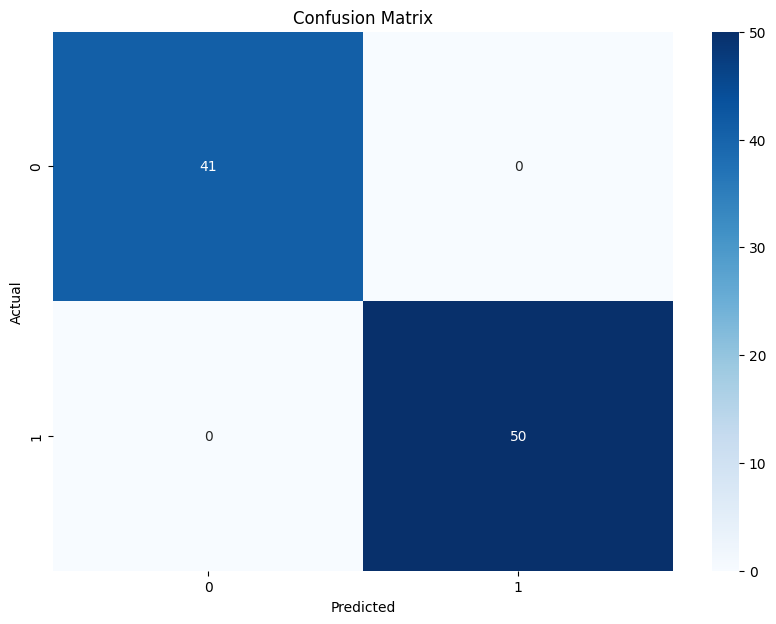

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


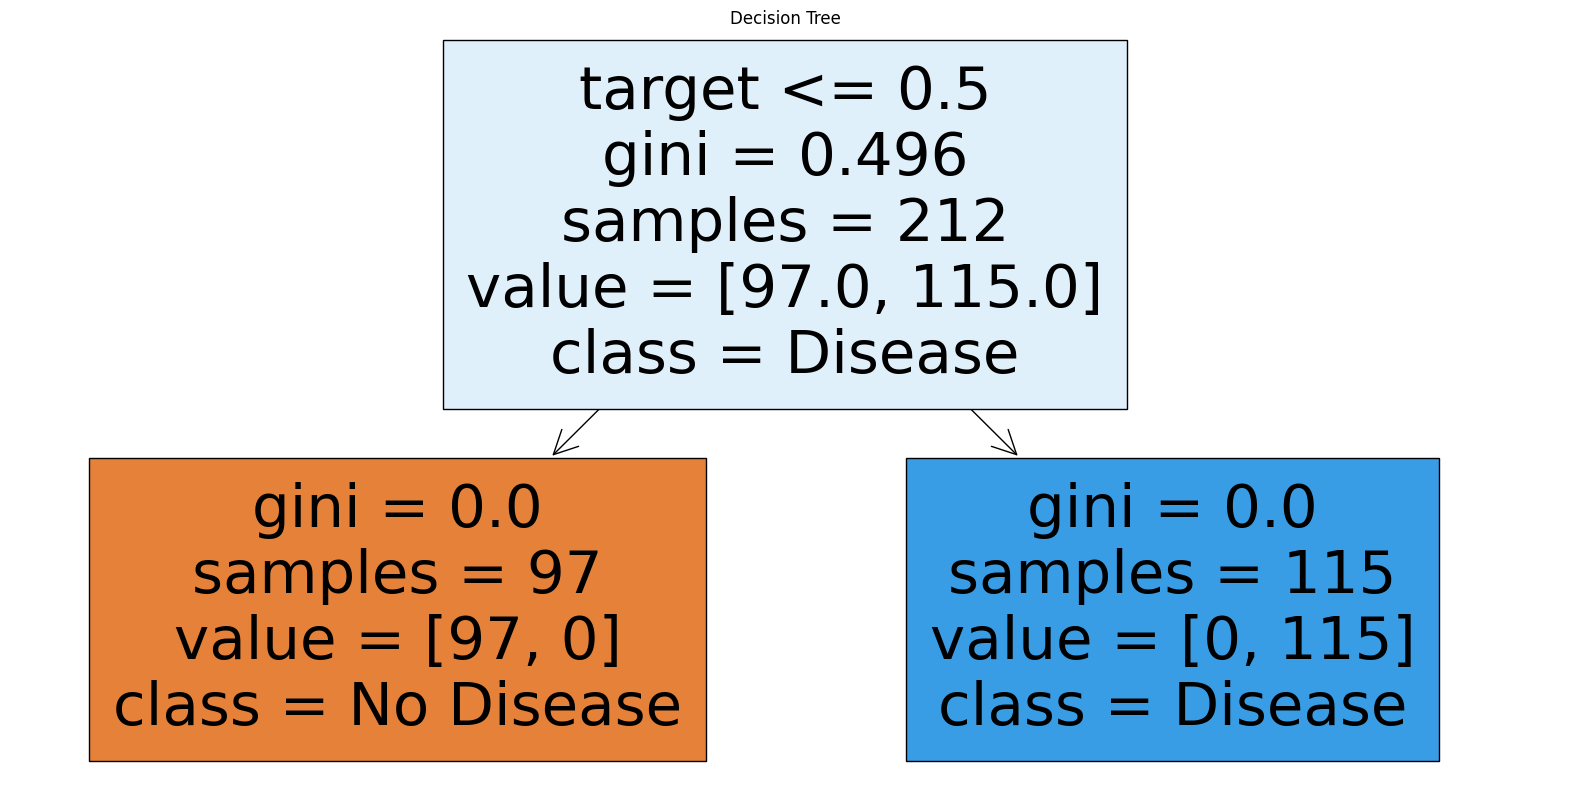

In [31]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title('Decision Tree')
plt.show()